In [1]:
%matplotlib nbagg
import matplotlib.pyplot as plt

from imp import reload

import qcodes as qc

qc.set_mp_method('spawn')  # force Windows behavior on mac

# this makes a widget in the corner of the window to show and control
# subprocesses and any output they would print to the terminal
qc.show_subprocess_widget()

C:\Anaconda3\lib\site-packages\IPython\kernel\__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


<IPython.core.display.Javascript object>

a:\qcodesfolder\qcodes\process\helpers.py:27: UserWarning: Multiprocessing is in beta, use at own risk
  warnings.warn("Multiprocessing is in beta, use at own risk", UserWarning)


In [2]:
import qcodes.instrument_drivers.rohde_schwarz.ZNB20 as vna; reload(vna)

<module 'qcodes.instrument_drivers.rohde_schwarz.ZNB20' from 'a:\\qcodesfolder\\qcodes\\instrument_drivers\\rohde_schwarz\\ZNB20.py'>

In [3]:
v1 =vna.ZNB20('VNA',  'TCPIP0::172.20.3.226::inst0::INSTR', server_name=None)

Connected to: Rohde-Schwarz ZNB8-4Port (serial:1311601044102194, firmware:2.54) in 0.11s


In [29]:
station = qc.Station(v1)

In [4]:
v1.trace()

([0.0017804778054941732,
  0.00010136373914665324,
  0.0008770027514872283,
  0.0005129919142587686,
  0.0021085235899966524,
  0.0013615178422703557,
  0.0018561693877668572,
  0.0017977047995300513,
  0.00025399171217123845,
  0.0015127332550800184],
 [-0.1738287979047545,
  2.3769606489186423,
  0.029707645570989004,
  -2.5538973951312887,
  2.344416767385199,
  2.612021164504223,
  2.621954180336138,
  -1.463581220478508,
  -3.026602253331936,
  -1.9862125827767576])

In [11]:
v1.start(6.6115e9)
v1.stop(6.6195e9)
v1.avg(1)
v1.npts(401)

In [12]:
data1 = qc.Loop(v1.power.sweep(-10,-60,2)).each(v1.trace).run(background = False)

DataSet:
   mode     = DataMode.LOCAL
   location = '2016-10-27/15-43-28'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Setpoint | VNA_power_set | power        | (26,)
   Measured | frequency     | frequency    | (26, 401)
   Measured | VNA_magnitude | magnitude    | (26, 401)
   Measured | VNA_phase     | phase        | (26, 401)
started at 2016-10-27 15:44:05


<IPython.core.display.Javascript object>


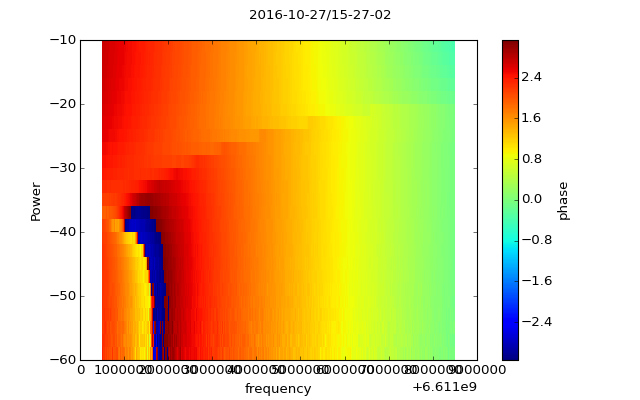

C:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_webagg_core.py:210: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  buff.shape = (renderer.height, renderer.width)
C:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_webagg_core.py:210: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  buff.shape = (renderer.height, renderer.width)
C:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: Fu

In [7]:
qc.MatPlot(data1.VNA_phase)

<IPython.core.display.Javascript object>


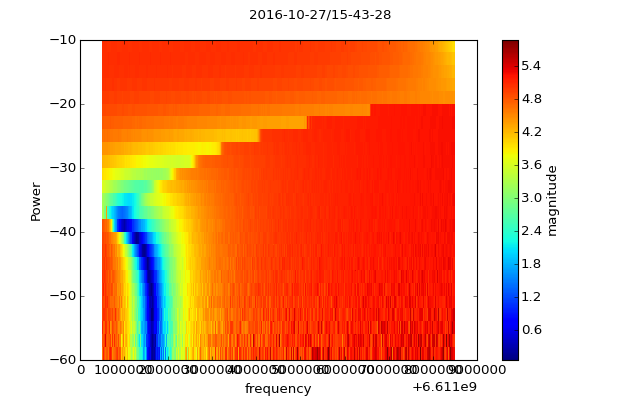

C:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_webagg_core.py:210: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  buff.shape = (renderer.height, renderer.width)
C:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_webagg_core.py:210: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  buff.shape = (renderer.height, renderer.width)


In [13]:
qc.MatPlot(data1.VNA_magnitude)

In [9]:
qc.QtPlot(data1.VNA_magnitude)

NameError: name 'data1' is not defined

In [6]:
v1.bandwidth(500)

In [4]:
v1.spec_state(1)

In [5]:
v1.cav_freq(6.61262e9)

In [7]:
v1.start(7.5e9)
v1.stop(8.5e9)
v1.avg(2)
v1.npts(501)
v1.power(-30)
v1.cav_pow(-55)

In [8]:
data2 = qc.Loop(v1.power.sweep(-10,-60,2)).each(v1.trace).run()

DataSet:
   mode     = DataMode.LOCAL
   location = '2016-10-27/15-49-37'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Setpoint | VNA_power_set | power        | (26,)
   Measured | frequency     | frequency    | (26, 501)
   Measured | VNA_magnitude | magnitude    | (26, 501)
   Measured | VNA_phase     | phase        | (26, 501)
started at 2016-10-27 15:50:24


In [9]:
qc.QtPlot(data2.VNA_magnitude)

In [12]:
import numpy as np
np.shape(data2.VNA_magnitude)

(26, 501)

In [ ]:
data2 = qc.Loop(v1.power.sweep(-10,-60,2)).each(
    qc.Task(v1.cav_freq())
    v1.trace).run()